## Motivation

<br>
The growth of e-commerce websites recently emerged the importance of recommender systems, where thes websites use customer's interests to generate recommended products and items. Customer's behaviors such as purchases, views, and ratings are crucial for many web-apps in order to recommend their users similar items based on these behaviors. Recommender systems have become useful tools for users by providing custom recommendations on items.

This notebook discuss the most commonly used filtering techniques for Recommeder Systems.

- Content–Based Filtering (CBF)
- Collaborative Filtering (CF)

**Imports**

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import collections


**Loading the data**


In [43]:
df1 = pd.read_csv("./tmdb_5000_credits.csv")
df2 = pd.read_csv("./tmdb_5000_movies.csv")


In [44]:
df1.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [45]:
df2.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Datasets Description**

The first dataset columns:

- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

The second dataset columns:

- budget - The budget of the movie.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - Link to the homepage of the movie.
- id - The movie_id as in the first dataset.
- keywords - Keywords and tags related to the movie.
- original_language - The language in which of the movie.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.


**Merging the two datasets**


In [46]:
df1.columns
df1.rename(columns={"movie_id": "id"}, inplace=True)

df = df2.merge(df1, on="id")
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Content Based Filtering


    Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.


### Movie-Plot Based Recommender
Recommend movies based on the pairwise similarity score of the movies overview. So, let's explore the overview feature.

In [47]:
print(df["overview"])
print('\nFirst entry of the overview feature:\n{}'.format(df["overview"].head()[0]))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

First entry of the overview feature:
In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.


In [48]:
##Replace NaN with an empty string
df['overview'].isnull().sum()
df["overview"].fillna("", inplace=True)

#### Tf-idf-weighted document-term matrix
Looking at `df['overview']`, we can see we have a series of 4803 description or documents.
We'll need to convert these into a numeric representation that scikit-learn can use.
The bag-of-words approach is simple and commonly used way to represent text for
use in machine learning, which ignores structure and
only counts how often each word occurs.

To achieve this goal, we can use:
- `CountVectorizer` : it allows us to use the bag-of-words approach
    by converting a collection of text documents into a matrix of token counts.
- `TfidfVectorizer`: it converts a collection of raw documents to a matrix of TF-IDF features. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens.

In [49]:
tfidf = TfidfVectorizer(stop_words="english").fit_transform(df["overview"])
tfidf.shape


(4803, 20978)

#### Cosine Similarity

It is a measure of similarity that can be used to compare documents or, say, give a ranking of documents with respect to a given vector of query words. 

<img src='./cosine.png' align='center'>

In [50]:
cosin_sim = cosine_similarity(tfidf, tfidf)
cosin_sim.shape


(4803, 4803)

The following function takes a movie title as an input then returns a list of the most 10 similar movies. Create a mapping between `movies['title']` and `df.index` will help achieve this goal as follow. 

In [51]:
indices = pd.Series(df.index, index=df["title_x"]).drop_duplicates()
indices


title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [52]:
def get_recommendations(title, cosin_sim=cosin_sim):
    #get the movie id given the title
    idx = indices[title]
    #compute the similarity score between this movie and all the movies
    #convert the list to tuple where 1st index is the movie id and 2nd index is the similarity score
    #sort them according to the similarity score
    #save only the first 10 elements
    similarity_scores = sorted(
        list(enumerate(cosin_sim[idx])), key=lambda x: x[1], reverse=True)[1:11]
    recommended_indices = [i[0] for i in similarity_scores]
    recommended_movies = df["title_x"].iloc[recommended_indices]
    #return the titles of these 10 elements
    return recommended_movies


In [53]:
get_recommendations("The Dark Knight Rises")


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [54]:
get_recommendations("Pirates of the Caribbean: At World's End")


2542    What's Love Got to Do with It
3095              My Blueberry Nights
2102                  The Descendants
1280                        Disturbia
3632             90 Minutes in Heaven
792                  Just Like Heaven
1709     Space Pirate Captain Harlock
1799                     Original Sin
2652       Bathory: Countess of Blood
4423                   Bang Bang Baby
Name: title_x, dtype: object

In [55]:
get_recommendations("My Date with Drew")


4100              Captive
868         Elizabethtown
2586          Firestarter
204             Fast Five
1685    Keeping the Faith
4532         Lonesome Jim
2156           Nancy Drew
3753              Boyhood
3623                 Made
3245                50/50
Name: title_x, dtype: object

### Cast, Keywords and Genres Based Recommender

The previous recommender is simple one, since it's based only on one feature `df['overview']`. Considering more feature such as `df[["cast", "crew", "keywords", "genres"]]` definitely will help increase the quality of the recommender. So, let's try add more features to the recommender and discuss the results.

Looking at `df[["cast", "crew", "keywords", "genres"]]` below, we need to extract the first 3 actors, the director, the keywords, and finally the genres. 

In [56]:
df[["cast", "crew", "keywords", "genres"]].head()


,cast,crew,keywords,genres
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [57]:
features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    df[feature] = df[feature].apply(literal_eval)


Function to extract the director name from `df['crew']`, if not found `return nan`

In [58]:
def get_director(crew):
    for i in crew:
        if i["job"] == "Director":
            return str.lower(i["name"].replace(" ", ""))
    return np.nan

df["director"] = df["crew"].apply(get_director)
df["director"]


0           jamescameron
1          goreverbinski
2              sammendes
3       christophernolan
4          andrewstanton
              ...       
4798     robertrodriguez
4799         edwardburns
4800          scottsmith
4801          danielhsia
4802     brianherzlinger
Name: director, Length: 4803, dtype: object

Exploring the first entry of `genres`, `keywords`, and `cast` below, each can have multiple values. So, we need a function to extract out the first 3 elemnts of each.

In [59]:
print('the first elemnt of genres:\n{}'.format(df["genres"][0]))
print('\nthe first elemnt of keywords:\n{}'.format(df["keywords"][0]))
print('\nthe first elemnt of cast:\n{}'.format(df["cast"][0]))

the first elemnt of genres:
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]

the first elemnt of keywords:
[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]

the first elemnt of cast:
[{'cast_id': 242, 'character': 'Jake Sully'

In [60]:
def extract_elements(feature):
    elements = [i["name"] for i in feature]
    if len(elements) > 3:
        elements = elements[:3]
    return elements

for i in ["cast", "keywords", "genres"]:
    df[i] = df[i].apply(extract_elements)

df[["title_x", "cast", "director", "keywords", "genres"]].head()



,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",jamescameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",goreverbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",sammendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",christophernolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",andrewstanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [61]:
def clean(feature):
    return [str.lower(i.replace(" ", "")) for i in feature]

for i in ["cast", "keywords", "genres"]:
    df[i] = df[i].apply(clean)

df[["title_x", "cast", "director", "keywords", "genres"]].info()

df["director"].fillna("", inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_x   4803 non-null   object
 1   cast      4803 non-null   object
 2   director  4773 non-null   object
 3   keywords  4803 non-null   object
 4   genres    4803 non-null   object
dtypes: object(5)
memory usage: 354.2+ KB


After extracting and cleaning the information, `cast`, `director`, `keywords`, `generes` features will be combined togther in one string feature to be an input to the `CountVectorizer` the next step.

In [63]:
def soup(x):
    return (
        " ".join(x["cast"])
        + " "
        + x["director"]
        + " "
        + " ".join(x["keywords"])
        + " "
        + " ".join(x["genres"])
    )

df["soup"] = df.apply(soup, axis=1)
df["soup"][0]


'samworthington zoesaldana sigourneyweaver jamescameron cultureclash future spacewar action adventure fantasy'

In [64]:
vect = CountVectorizer(stop_words="english").fit_transform(df["soup"])
cosin_sim2 = cosine_similarity(vect, vect)

print(get_recommendations("The Dark Knight Rises", cosin_sim2))
print(get_recommendations("Pirates of the Caribbean: At World's End", cosin_sim2))
print(get_recommendations("The Godfather", cosin_sim2))


65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object
12            Pirates of the Caribbean: Dead Man's Chest
199    Pirates of the Caribbean: The Curse of the Bla...
13                                       The Lone Ranger
17           Pirates of the Caribbean: On Stranger Tides
71                 The Mummy: Tomb of the Dragon Emperor
786                                    The Monkey King 2
75                                            Waterworld
103                            The Sorcerer's Apprentice
131                                              G-Force
215               Fantastic 4: Rise of the Silver Surfer
Name: title_x, dtype: object
867      The Godfather: Part III
2731     

## Collaborative Filtering


The previous models are not personalized, meaning that it doesn't take the user interest or taste in consideration. **Collaborative Filtering** can deal with that issue since it depends on the history of the user's behaviour and the interaction with items.

The user interaction with items can be either **explict** like giving rating or feedback to an item or **implict** as clicks or views.

**There are two types of Collaborative Filtering:**
1. Memory-Based Collaborative Filtering
2. Model-Based Collaborative Filtering

In [2]:
# Load each data set (users, movies, and ratings).

users_cols = ["user_id", "age", "sex", "occupation", "zip_code"]
users = pd.read_csv("./ml-100k/ml-100k/u.user", sep="|", names=users_cols)

ratings_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
ratings = pd.read_csv("./ml-100k/ml-100k/u.data", sep="\t", names=ratings_cols)

# The movies file contains a binary feature for each genre.

genre_cols = [
    "genre_unknown",
    "Action",
    "Adventure",
    "Animation",
    "Children",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]
movies_cols = [
    "movie_id",
    "title",
    "release_date",
    "video_release_date",
    "imdb_url",
] + genre_cols

movies = pd.read_csv(
    "./ml-100k/ml-100k/u.item", sep="|", names=movies_cols, encoding="latin-1"
)


In [3]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Shift the indecies to start from 0 since it starts with 1
users["user_id"] = users["user_id"].apply(lambda x: str(x - 1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x - 1))
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x - 1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x - 1))

movies["year"] = movies["release_date"].apply(lambda x: str(x).split("-")[-1])
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

#Number of movies in each genre
genre_occurance = movies[genre_cols].sum().to_dict()
genre_occurance

Create two columns to represent the genre since each movie can have more than one genre.
- `genre` which picks only one random genre from the movie genres.
- `all_genres` which joins all the genres of the movie in one string.

In [7]:
def assign_genre(movies, genres):
    def get_random_genre(gs):
        active = [genre for genre, g in zip(genres, gs) if g == 1]
        if len(active) == 0:
            return "Other"
        return np.random.choice(active)

    def get_all_genre(gs):
        active = [genre for genre, g in zip(genres, gs) if g == 1]
        if len(active) == 0:
            return "Other"
        return "-".join(active)

    movies["genre"] = [
        get_random_genre(gs) for gs in zip(*[movies[genre] for genre in genres])
    ]
    movies["all_genres"] = [
        get_all_genre(gs) for gs in zip(*[movies[genre] for genre in genres])
    ]
assign_genre(movies, genre_cols)


In [8]:
movielens = ratings.merge(movies, on="movie_id").merge(users, on="user_id")
movielens.head()

In [13]:
# Functions to split the data into train and test sets.
def split_df(df, holdout_fraction=0.9):

    train = df.sample(frac=holdout_fraction, replace=False)
    test = df[~df.index.isin(train.index)]

    return train, test


In [21]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,195,241,3.0,881250949
1,185,301,3.0,891717742
2,21,376,1.0,878887116
3,243,50,2.0,880606923
4,165,345,1.0,886397596


In [14]:
def build_ratings_tensor(ratings):
    indices = ratings[['user_id', 'movie_id']].values
    values = ratings['rating'].values

    return tf.SparseTensor(
        indices=indices,
        values=values,
        dense_shape=[users.shape[0], movies.shape[0]])

In [15]:
def mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
    predictions = tf.gather_nd(
        tf.matmul(user_embeddings, movie_embeddings, transpose_b=True), sparse_ratings.indices)
    loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)

    return loss

In [25]:
class CFModel(object):
  def __init__(self, embedding_vars, loss, metrics=None):
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):

    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)  

      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          tf.initialize_all_variables().run()
   

    with self._session.as_default():
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

In [26]:
def build_model(ratings, embedding_dim=3, init_stddev=1.):
 
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_df(ratings)

  # SparseTensor representation of the train and test datasets.
  A_train = build_ratings_tensor(train_ratings)
  A_test = build_ratings_tensor(test_ratings)
  
  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))

  train_loss = mean_square_error(A_train, U, V)
  test_loss = mean_square_error(A_test, U, V)
  
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "user_id": U,
      "movie_id": V
  }
  return CFModel(embeddings, train_loss, [metrics])

 iteration 500: train_error=0.507608, test_error=1.2839164

[{'train_error': 0.5076079, 'test_error': 1.2839155}]

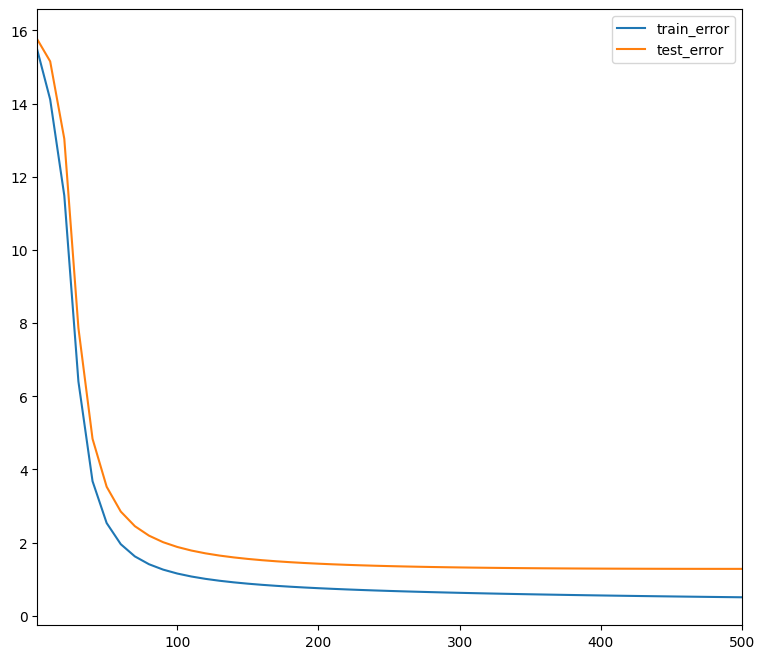

In [27]:
# Build the CF model and train it.
model = build_model(ratings, embedding_dim=30, init_stddev=0.5)
model.train(num_iterations=500, learning_rate=10.)

In [28]:
DOT = 'dot'
COSINE = 'cosine'
def similarity_scores(query_embedding, item_embeddings, measure=DOT):
    u = query_embedding
    V = item_embeddings
    if measure == COSINE:
        V = V / np.linalg.norm(V, axis=1, keepdims=True)
        u = u / np.linalg.norm(u)
    scores = u.dot(V.T)
    return scores

In [33]:
def similar_items(model, title_substring, measure=DOT, k=6):
    ids = movies[movies['title'].str.contains(title_substring)].index.values
    titles = movies.iloc[ids]['title'].values
    if len(titles) == 0:
        raise ValueError("Found no movies with title %s" % title_substring)

    print("Nearest neighbors of : %s." % titles[0])
    if len(titles) > 1:
        print("[Found more than one matching movie. Other candidates: {}]".format(
        ", ".join(titles[1:])))
    
    movie_id = ids[0]
    scores = similarity_scores(model.embeddings['movie_id'][movie_id], model.embeddings['movie_id'], measure)

    scores_key = measure + 'score'
    df = pd.DataFrame({
        scores_key: list(scores),
        'titles': movies['title'],
        'genre': movies['all_genres'] 
    })

    return (df.sort_values([scores_key], ascending=False).head(k))

In [37]:
similar_items(model, "Aladdin", DOT)


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dotscore,titles,genre
94,5.541408,Aladdin (1992),Animation-Children-Comedy-Musical
142,5.134488,"Sound of Music, The (1965)",Musical
430,5.112379,Highlander (1986),Action-Adventure
951,4.887589,Blue in the Face (1995),Comedy
168,4.879743,"Wrong Trousers, The (1993)",Animation-Comedy
488,4.820982,Notorious (1946),Film-Noir-Romance-Thriller


In [38]:
similar_items(model, "Aladdin", COSINE)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosinescore,titles,genre
94,1.000000,Aladdin (1992),Animation-Children-Comedy-Musical
0,0.825220,Toy Story (1995),Animation-Children-Comedy
14,0.815180,Mr. Holland's Opus (1995),Drama
731,0.814799,Dave (1993),Comedy-Romance
201,0.804473,Groundhog Day (1993),Comedy-Romance
215,0.790594,When Harry Met Sally... (1989),Comedy-Romance


In [39]:
def build_regularized_model(ratings, embedding_dim=3, regularization_coeff=.1, init_stddev=1.):
 
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_df(ratings)

  # SparseTensor representation of the train and test datasets.
  A_train = build_ratings_tensor(train_ratings)
  A_test = build_ratings_tensor(test_ratings)
  
  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))

  train_loss = mean_square_error(A_train, U, V)
  test_loss = mean_square_error(A_test, U, V)
  regularization_loss = regularization_coeff * (
    tf.reduce_sum(U*U)/U.shape[0].value + tf.reduce_sum(V*V)/V.shape[0].value)
  
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss,
      'regularization_loss': regularization_loss
  }
  embeddings = {
      "user_id": U,
      "movie_id": V
  }
  return CFModel(embeddings, train_loss + regularization_loss, [metrics])

 iteration 500: train_error=0.541402, test_error=0.887559, regularization_loss=0.6795589

[{'train_error': 0.54140246,
  'test_error': 0.88755935,
  'regularization_loss': 0.6795576}]

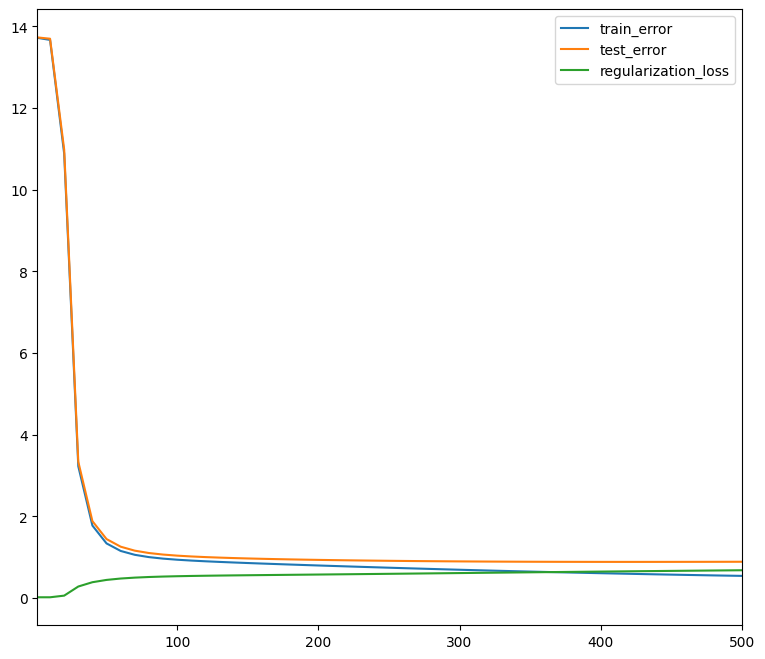

In [40]:
reg_model = build_regularized_model(ratings, regularization_coeff=0.1, embedding_dim=35, init_stddev=.05)
reg_model.train(num_iterations=500, learning_rate=20.)

In [41]:
similar_items(reg_model, "Aladdin", DOT)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dotscore,titles,genre
63,6.437409,"Shawshank Redemption, The (1994)",Drama
94,6.363256,Aladdin (1992),Animation-Children-Comedy-Musical
173,6.352401,Raiders of the Lost Ark (1981),Action-Adventure
317,6.239150,Schindler's List (1993),Drama-War
21,6.222909,Braveheart (1995),Action-Drama-War
49,6.222569,Star Wars (1977),Action-Adventure-Romance-Sci-Fi-War


In [42]:
similar_items(reg_model, "Aladdin", COSINE)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosinescore,titles,genre
94,1.000000,Aladdin (1992),Animation-Children-Comedy-Musical
1036,0.913496,Grease 2 (1982),Comedy-Musical-Romance
1132,0.906455,Escape to Witch Mountain (1975),Adventure-Children-Fantasy
1077,0.903102,Oliver & Company (1988),Animation-Children
163,0.902547,"Abyss, The (1989)",Action-Adventure-Sci-Fi-Thriller
552,0.902206,"Walk in the Clouds, A (1995)",Drama-Romance


## Resources